## 1-تحلیل داده تعداد پرواز هر شرکت در هرماه 

####  ما داخل این تحلیلی که انجام دادیم متوجه میشیم که در تعداد پرواز ها در دو ماه اول کاهش داشته که میتونه یکی از دلایل این کاهش این باشه که تعطیلات کریسمس بوده و تقریبا بعد از به اتمام رسیدن تعطیلات دوباره تعداد پرواز ها افزایش پیدا کرده .

Average :  430.1666666666667
variance :  6197.472222222223


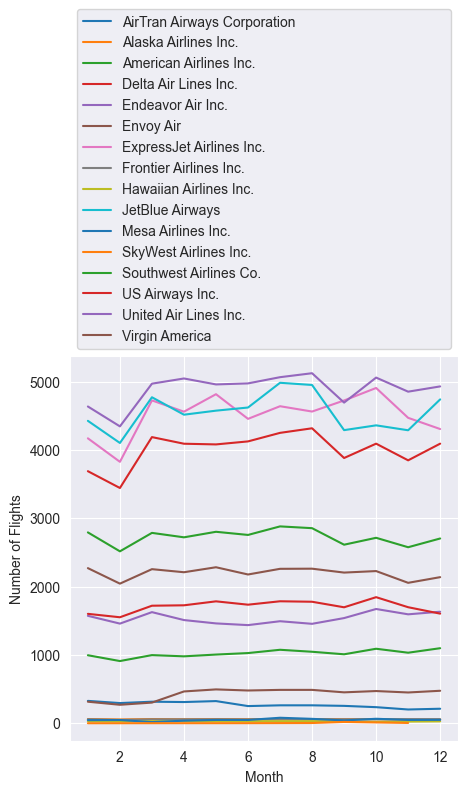

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv')
# تعداد پروازهای هر شرکت در هر ماه
flights_per_month = df.groupby(['name', 'year', 'month'])['flight'].count().reset_index()
# رسم نمودار
fig, ax = plt.subplots(figsize=(5, 5))

for carrier in flights_per_month['name'].unique():
    data = flights_per_month[flights_per_month['name'] == carrier]
    ax.plot(data['month'], data['flight'], label=carrier)
mean = np.mean(data['flight'])
print('Average : ',mean)
variance = np.var(data['flight'])
print('variance : ',variance)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Flights')
ax.legend(bbox_to_anchor=(0, 1, 1, 0.2), loc='lower left', mode='expand', ncol=1)
plt.show()

## 2- تحلیل داده دقیقه تاخیر پرواز در هر ماه برای هر شرکت

#### با استفاده از این تحلیل میتونیم نگاه کنیم چه شرکت هایی مقدار تاخیر کمتری را در سال داشته اند و آن ها را برای مثال به مسافران معرفی کنیم 
#### !!به دلیل زیاد بودن نمودار ها باید عکس را زوم کنید تا نمودار ها را بهتر ببینید!!

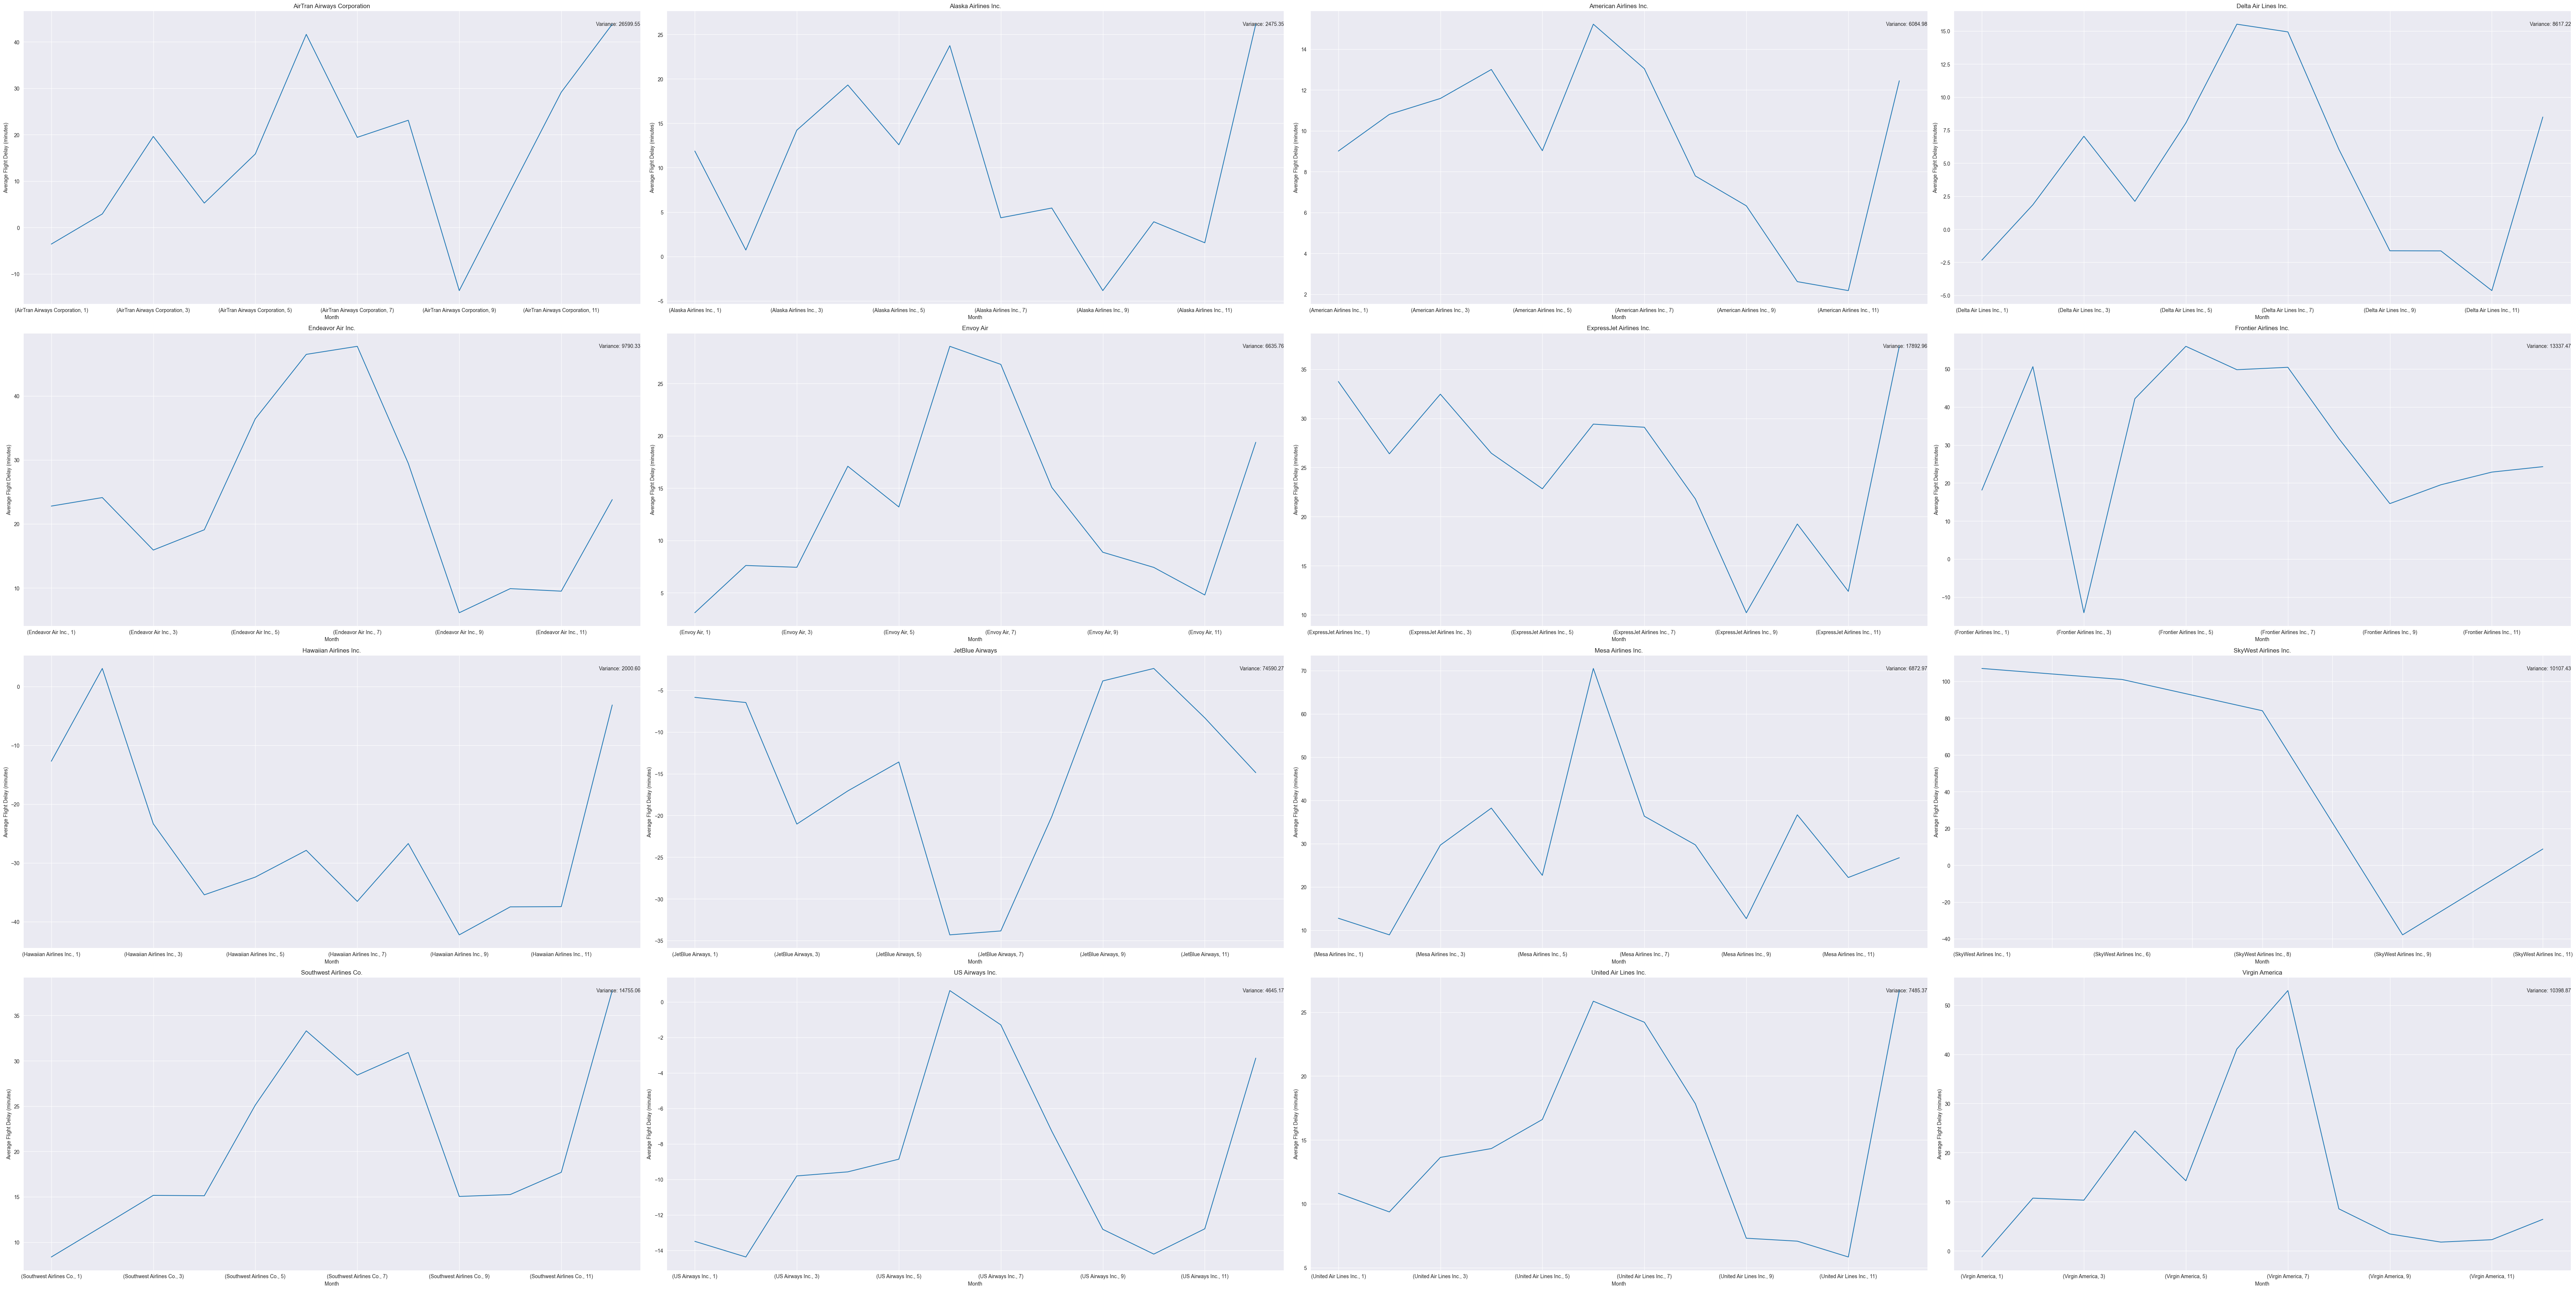

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv')

df['flight_date'] = pd.to_datetime(df[['year', 'month', 'day']])

df['flight_delay'] = df['dep_time'] - df['sched_dep_time']

# دیتا های تاخیر پرواز را بر اساس شرکت هواپیمایی و ماه گروه بندی میکنیم
airline_month_delay = df.groupby(['name', 'month'])['flight_delay'].mean()
airline_month_variance = df.groupby(['name', 'month'])['flight_delay'].var()

# نمودار تاخیر هر شرکت هواپیمایی را درست میکنیم 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(70,35))
for i, (airline, data) in enumerate(airline_month_delay.groupby('name')):
    ax = axes[i//4,i%4]
    data.plot(ax=ax, title=airline)
    ax.set_ylabel('Average Flight Delay (minutes)')
    ax.set_xlabel('Month')
    ax.text(1, 0.95, f'Variance: {airline_month_variance[airline].mean():.2f}', transform=ax.transAxes, ha='right',)
plt.tight_layout()
plt.show()

## 3-تحلیل داده تاخیر رسیدن پرواز به مقصد نسبت به ساعت

####  داخل تحلیلی که پایین انجام دادیم متوجه میشیم که هرچی به ساعت 22.5 شب نزدیک تر میشیم دقیقه های تاخیر بیشتر میشن که یعنی احتمال این داره که هرچی ما به شب نزدیک تر میشویم احتمال اینکه هواپیما ما به تاخیر بخوره بیشتر است

Variance Delay by Hour:
        arr_delay
hour             
1             NaN
5      494.540475
6      798.609848
7      851.547989
8     1143.242519
9     1209.374094
10    1439.077480
11    1356.878578
12    1412.947408
13    1700.423278
14    2175.379752
15    2369.040383
16    2784.222876
17    3085.397643
18    2901.558607
19    3147.539281
20    2649.918127
21    2349.414729
22    1717.208933
23    1312.079343


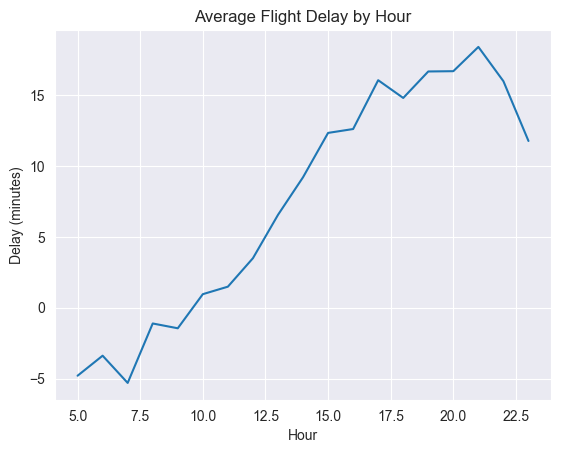

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv')

df_delay = df[['arr_delay', 'hour']]
df_delay_avg = df_delay.groupby('hour').mean()

df_delay_var = df_delay.groupby('hour').var()
print('Variance Delay by Hour:')
print(df_delay_var)


plt.plot(df_delay_avg.index, df_delay_avg.arr_delay)

plt.title('Average Flight Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Delay (minutes)')
plt.show()


# خسته نباشید 